In [68]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False)
from sympy.matrices import Matrix
from sympy.abc import t as T

#returns the Vandermonde matrix for a list of points
def Vandermonde(lst):
    return Matrix([[i**n for n in range(0,len(lst))] for i,j in lst])

#takes a list of points and builds the Adjoint matrix of the Vandermonde matrix and the column vector for the y values
def AdjVandermonde(lst):
    return Matrix([[i**n for n in range(0,len(lst))] for i,j in lst]).col_insert(len(lst)+1,Matrix([j for i,j in lst]))      

#takes a list of points, finds the rref of the adjoint vandermonde matrix and returns a function
#that is the interpolating polynomial of the points
def inter_pol(lst):
    coef = AdjVandermonde(lst).rref(pivots=False)[:,len(lst)]
    return lambda t : sum(coef[i]*t**i for i in range(len(lst)))

#symbolic version of inter_pol()
def symb_inter_pol(lst):
    coef = AdjVandermonde(lst).rref(pivots=False)[:,len(lst)]
    return sum(coef[i]*T**i for i in range(len(lst)))

#tests an interpolation polynomial against the interpolated data, returns the percent difference between the values
def test_fit_error(fn, lst):
    def percent_error(x,y):
        return 100*abs(x-y)/((x+y)/2)
    return[percent_error(fn(i),j) for i,j in lst]

data = np.array([[3.86,65.34],[13,44.85],[22,52.75],[34,50.46],[54,68.87],[70,61.25]])

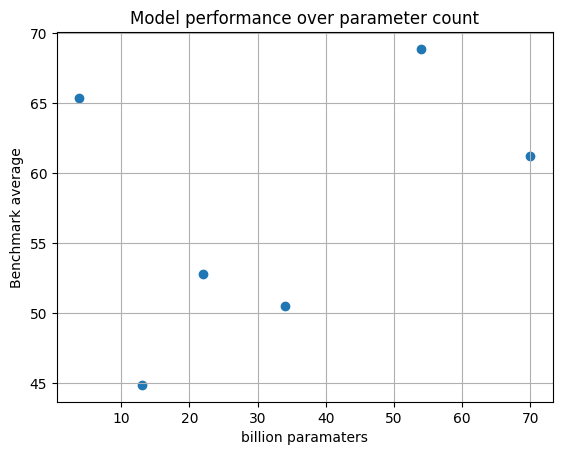

In [59]:
fig,ax = plt.subplots()
ax.scatter([i for i,j in data],[j for i,j in data])
ax.set(xlabel="billion paramaters", ylabel = "Benchmark average", title = "Model performance over parameter count")
ax.grid()
fig.savefig("scatter.png")

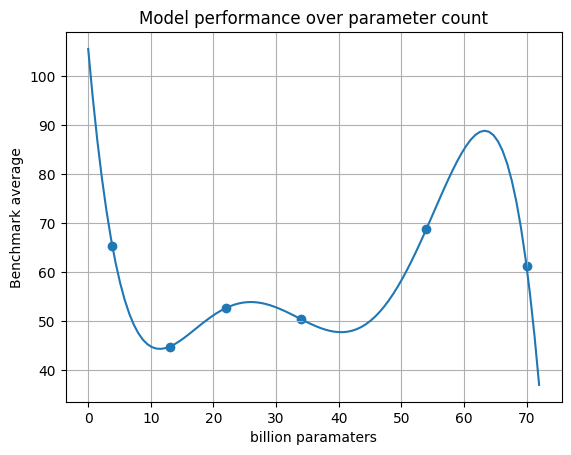

In [60]:
fig,ax = plt.subplots()
ax.scatter([i for i,j in data],[j for i,j in data])
ax.set(xlabel="billion paramaters", ylabel = "Benchmark average", title = "Model performance over parameter count")
ax.grid()

t = np.linspace(0,72,100)
f = inter_pol(data)
ax.plot(t,f(t))
fig.savefig("interpolated")

In [61]:
Vandermonde(data)

[1.0  3.86  14.8996  57.512456  221.99808016  856.9125894176]
[                                                           ]
[1.0  13.0   169.0    2197.0      28561.0        371293.0   ]
[                                                           ]
[1.0  22.0   484.0    10648.0     234256.0      5153632.0   ]
[                                                           ]
[1.0  34.0  1156.0    39304.0    1336336.0      45435424.0  ]
[                                                           ]
[1.0  54.0  2916.0   157464.0    8503056.0     459165024.0  ]
[                                                           ]
[1.0  70.0  4900.0   343000.0    24010000.0    1680700000.0 ]

In [62]:
AdjVandermonde(data)

[1.0  3.86  14.8996  57.512456  221.99808016  856.9125894176  65.34]
[                                                                  ]
[1.0  13.0   169.0    2197.0      28561.0        371293.0     44.85]
[                                                                  ]
[1.0  22.0   484.0    10648.0     234256.0      5153632.0     52.75]
[                                                                  ]
[1.0  34.0  1156.0    39304.0    1336336.0      45435424.0    50.46]
[                                                                  ]
[1.0  54.0  2916.0   157464.0    8503056.0     459165024.0    68.87]
[                                                                  ]
[1.0  70.0  4900.0   343000.0    24010000.0    1680700000.0   61.25]

In [63]:
AdjVandermonde(data).rref(pivots=False)

[1  0  0  0  0  0    105.625814854669  ]
[                                      ]
[0  1  0  0  0  0   -14.4954360509504  ]
[                                      ]
[0  0  1  0  0  0    1.20708169670063  ]
[                                      ]
[0  0  0  1  0  0  -0.0428558521407496 ]
[                                      ]
[0  0  0  0  1  0  0.000673664318495274]
[                                      ]
[0  0  0  0  0  1  -3.81955054912575e-6]

In [64]:
symb_inter_pol(data)

In [67]:
test_fit_error(inter_pol(data),data)

In [69]:
inter_pol(data)(54)